In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('/kaggle/input/zomato-data-analysis/zomato.csv',nrows=5)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,Unnamed: 4150,Unnamed: 4151,Unnamed: 4152,Unnamed: 4153,Unnamed: 4154,Unnamed: 4155,Unnamed: 4156,Unnamed: 4157,Unnamed: 4158,Unnamed: 4159
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import pandas as pd

file_path = '/kaggle/input/zomato-data-analysis/zomato.csv'

# Read in chunks of 100,000 rows
chunk_list = []  # to hold the data chunks

for chunk in pd.read_csv(file_path, chunksize=100000, low_memory=False):
    chunk_list.append(chunk)

# Combine all chunks into one DataFrame
df = pd.concat(chunk_list)

print("✅ File loaded successfully!")
print("Shape:", df.shape)

✅ File loaded successfully!
Shape: (56250, 4160)


In [22]:
df.shape
df.head()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56250 entries, 0 to 56249
Columns: 4160 entries, url to Unnamed: 4159
dtypes: object(4160)
memory usage: 7.6 GB


In [23]:
import pandas as pd
import re

# Load your dataframe (replace with your filename as needed)
df = pd.read_csv('/kaggle/input/zomato-data-analysis/zomato.csv', low_memory=False)

# Function to extract numeric rating from review text
def extract_rating(review):
    match = re.search(r'Rated\s*([0-9.]+)', str(review))
    return float(match.group(1)) if match else None

# Extract ratings into a new column
df['rate'] = df['reviews_list'].apply(extract_rating)

# Function to clean text (remove unwanted symbols and whitespace)
def clean_review_text(text):
    text = str(text)
    # Remove rating part
    text = re.sub(r'\(?Rated.*?\)', '', text)
    # Remove numbers, special chars, excessive spaces
    text = re.sub(r'[\d]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

# Apply cleaning to review column, store as 'clean_review'
df['clean_review'] = df['reviews_list'].apply(clean_review_text)

# Remove rows without numeric ratings or with empty review
df = df.dropna(subset=['rate', 'clean_review'])

# Basic analysis: rating statistics
print("Rating statistics:")
print(df['rate'].describe())

# Sample cleaned reviews and ratings
print(df[['rate', 'clean_review']].sample(5))

# Count missing ratings
print("Missing ratings:", df['rate'].isnull().sum())

# If needed, save the cleaned dataframe
df.to_csv('cleaned_reviews.csv', index=False)

Rating statistics:
count    45340.000000
mean         3.533624
std          1.316845
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rate, dtype: float64
       rate                                       clean_review
15377   1.0                                                   
7365    5.0  Hara bhara kebabnAlfredo pastan Butter kulcha ...
34707   4.0  Roti rice and sweet plus raitannPackaging was ...
55402   4.0                                                   
781     3.5                                                   
Missing ratings: 0


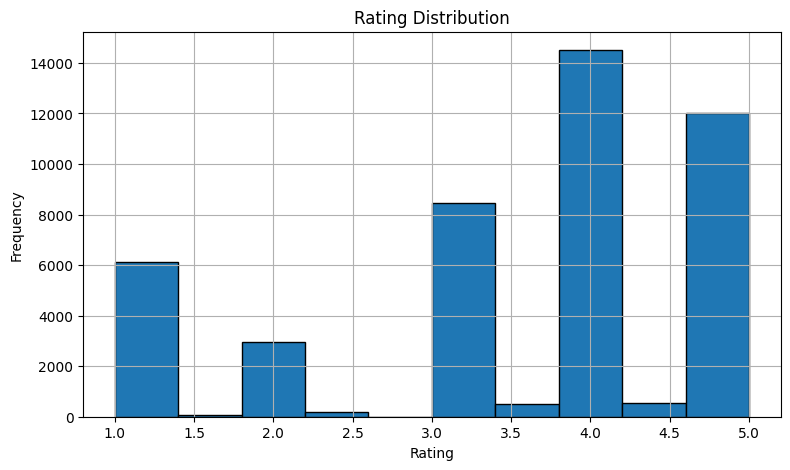

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
df['rate'].hist(bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.show()

In [25]:
from textblob import TextBlob

# Calculate sentiment polarity (-1 to 1)
df['sentiment'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Show some sentiment samples with ratings
print(df[['rate', 'sentiment', 'clean_review']].sample(5))

       rate  sentiment                                       clean_review
48102   3.0  -0.009375  Panner Butter Masala was no where close to a d...
10695   5.0   0.000000                                                   
1987    4.0   0.000000                                                   
55028   3.0   0.000000                                                   
31119   3.0   0.000000                                                   


In [31]:
df.to_csv('cleaned_reviews.csv', index=False)

In [33]:
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df['rate'].describe())
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 45340 entries, 0 to 56249
Columns: 4162 entries, url to sentiment
dtypes: float64(2), object(4160)
memory usage: 1.4+ GB
None
url                 12
address              0
name                 0
online_order         0
book_table           0
                 ...  
Unnamed: 4157    45339
Unnamed: 4158    45339
Unnamed: 4159    45339
clean_review         0
sentiment            0
Length: 4162, dtype: int64
33
count    45340.000000
mean         3.533624
std          1.316845
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rate, dtype: float64
                                                     url  \
11969  https://www.zomato.com/bangalore/bakimo-korama...   
20428  https://www.zomato.com/bangalore/library-bar-t...   
25648  https://www.zomato.com/bangalore/ibaco-nagawar...   
33227   had to much water content . they need to impr...   
29797  https://www.zomato.com/bangalore/keb

In [34]:
df.to_csv('cleaned_reviews.csv', index=False)